In [ ]:
from platform import python_version

print(python_version())

3.6.9


In [ ]:
import os;
import pandas as pd
path=pd.read_csv(r"https://in.finance.yahoo.com/quote/NFLX/history?p=rds-a.tsrc=fin-srch",error_bad_lines=False)
os.getcwd()

b'Skipping line 25: expected 316 fields, saw 1435\nSkipping line 57: expected 316 fields, saw 13640\n'


'/content'

In [ ]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from google.colab import files

In [ ]:
 variables = files.upload()
 variables = pd.read_csv('NFLX.csv')

Saving NFLX.csv to NFLX.csv


In [ ]:
for i in variables:        
        if i == "price":
            print (i)
            print (variables[i])

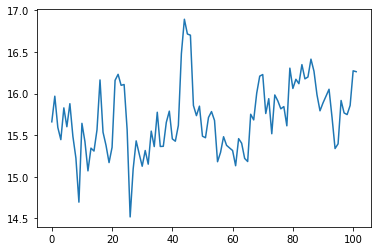

In [ ]:
lnprice=np.log(variables[i])
lnprice
plt.plot(lnprice)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


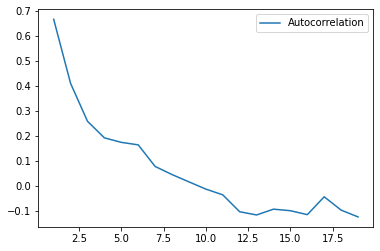

In [ ]:
import pandas as pd
acf_1 =  acf(lnprice)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot()
plt.show()

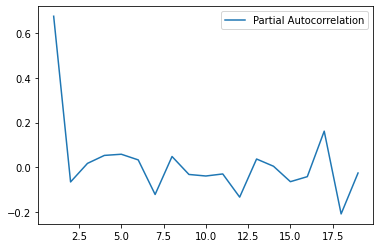

In [ ]:
pacf_1 =  pacf(lnprice)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


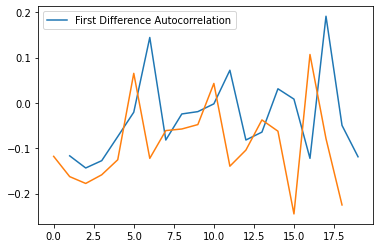

In [ ]:
result = ts.adfuller(lnprice, 1)
result
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot()
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

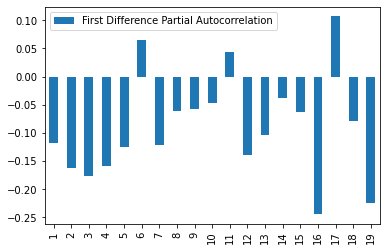

In [ ]:
test_df = pd.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  101
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -34.210
Method:                           css   S.D. of innovations              0.340
Date:                Wed, 15 Apr 2020   AIC                             72.421
Time:                        17:52:48   BIC                             77.651
Sample:                             1   HQIC                            74.538
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.034      0.177      0.860      -0.060       0.072


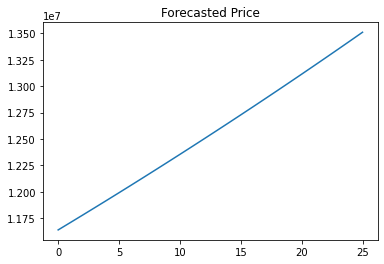

In [ ]:
price_matrix=lnprice.to_numpy()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(122, 127, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Price')
plt.show()